# Lab: Pulse Oximeter 
### 10.26.18   |   Jonathan Kelley   |  ISIM

In this lab, we will be using a series of amplifiers and filters to capture the flow of blood through a human finger. Our amplifier will be an AD623 and our filters will be a series of RC and CR combinations. 

We used the diagram in Figure 1 to construct our cirucit.

![Figure 1: Our circuit](pulseoximitercircuit.png)


Our final constructed circuit can be found in Figure 2.

![Figure 2: Pulse Oximiter Final Circuit](circuitpulse.jpg)

We can see the two sets of amplifiers and filters to boost the heartrate signal and cut down on electrical noise.

The time constant for the high pass filter was 0.0159s which I constructed with a 10 uF capacitor and a 1600 ohm resistor. 

The time constant for the low pass filter was 0.159s which I constructed with a 10 uF capacitor and a 16000 ohm resistor. 

The gain for both filters was 10 and was constructed with a combination of a 100 ohm and 1000 ohm resistor combination.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/usr/local/Cellar/python/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Text(0.5,1,'Raw pressure data')

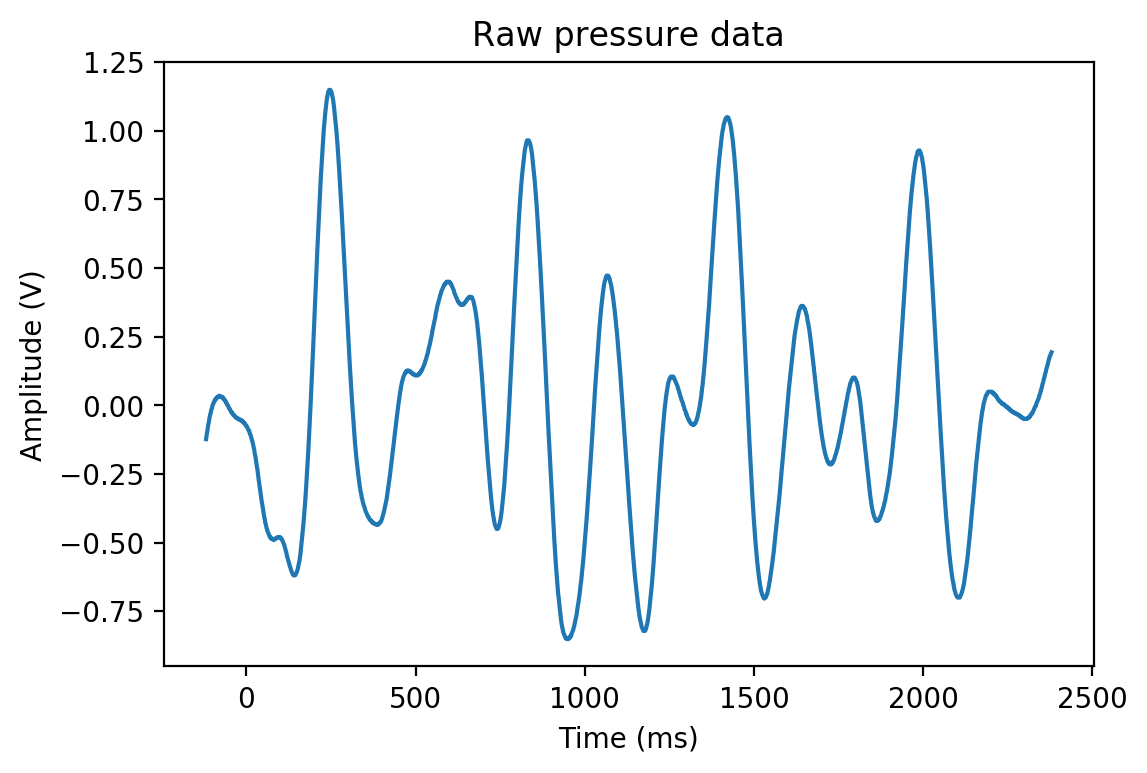

In [26]:
pressure = pd.read_csv("bestpulse.csv", skiprows = 8)
plt.figure(dpi = 200)
readto = 2000
plt.plot(((5+pressure['Time (s)'])*1000)[:readto], pressure['Channel 2 (V)'][:readto])
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (V)")
plt.title("Raw pressure data")

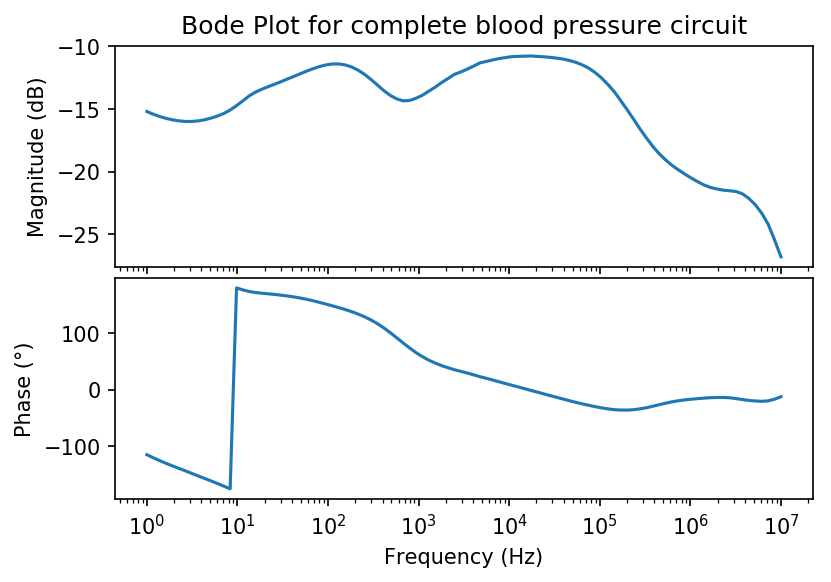

In [27]:
bode_plot("secondstagebode.csv")

In [22]:
def bode_plot(file_name):
    data = pd.read_csv(file_name, skiprows = 20)
    w = data['Frequency (Hz)']
    magnitude = data['Channel 2 Magnitude (dB)']
    phase = data['Channel 2 Phase (°)']
    
    fig = plt.figure(dpi = 150)
    ax1 = plt.subplot(211)
    plt.semilogx(w, magnitude)    # Bode magnitude plot
    plt.title("Bode Plot for complete blood pressure circuit")
    plt.ylabel("Magnitude (dB)")
    
    ax2 = plt.subplot(212)
    plt.semilogx(w, phase)  # Bode phase plot
    plt.ylabel("Phase (°)")    
    plt.subplots_adjust(wspace=0, hspace=.05)
    plt.xlabel("Frequency (Hz)")
    plt.show()
